<a href="https://colab.research.google.com/github/AsmitaWankhade/Cats-and-dogs-audio-classification/blob/main/cats_dogs_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries

import numpy as np
import pandas as pd

In [ ]:
import librosa 
import tensorflow as tf
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import tensorflow.keras.layers as layers
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

ID=[]
label=[]
# assign directory
directory = '/content/drive/MyDrive/cats_dogs/train/'
 

for folder in os.listdir(directory):                               
    for filename in os.listdir(directory+str(folder)):          
        f = os.path.join(directory+str(folder), filename)    
        if os.path.isfile(f):
            ID.append(f.split('/')[-1])
            label.append(f.split('/')[-2])

In [ ]:
train_data=pd.DataFrame()
train_data['ID']=ID
train_data['label']=label

In [ ]:
train_data

,ID,label
0,dog_barking_61.wav,dog
1,dog_barking_52.wav,dog
2,dog_barking_107.wav,dog
3,dog_barking_11.wav,dog
4,dog_barking_5.wav,dog
...,...,...
205,cat_99.wav,cat
206,cat_96.wav,cat
207,cat_81.wav,cat
208,cat_83.wav,cat


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


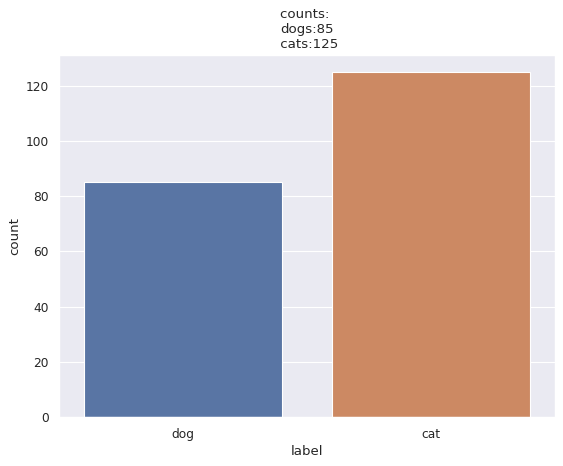

In [ ]:
#count values of each class to see if data is imbalanced

plt.figure(figsize=(8,6),dpi=80)
sns.set_theme(style="darkgrid")
sns.countplot('label',data=train_data)
plt.title('counts: \n' +'dogs:'+str(train_data.label.value_counts()[1])+
          '\n cats:'+str(train_data.label.value_counts()[0]))
plt.show()

In [ ]:
ID=[]
label=[]
# import required module
import os
# assign directory
directory = '/content/drive/MyDrive/cats_dogs/test/'
 
# iterate over files in
# that directory

for folder in os.listdir(directory):
    for filename in os.listdir(directory+str(folder)):
        f = os.path.join(directory+str(folder), filename)
        if os.path.isfile(f):
            ID.append(f.split('/')[-1])
            label.append(f.split('/')[-2])

In [ ]:
test_data=pd.DataFrame()
test_data['ID']=ID
test_data['label']=label
test_data

,ID,label
0,cat_148.wav,cats
1,cat_133.wav,cats
2,cat_14.wav,cats
3,cat_135.wav,cats
4,cat_130.wav,cats
...,...,...
62,dog_barking_34.wav,dogs
63,dog_barking_46.wav,dogs
64,dog_barking_62.wav,dogs
65,dog_barking_59.wav,dogs


In [ ]:
# extract features using librosa library
#mfcc -In audio pre-processing, Mel frequency is a representation of short term power spectrum of sound. Audio sample is converted to mel-
#freuency coefficients using : mel(f)=2595*log(1+f/700)
def extract_features(directory):
    features=[]
    ID=[]
    for folder in os.listdir(directory):
        for filename in os.listdir(directory+str(folder)):
            f = os.path.join(directory+str(folder), filename)
            if os.path.isfile(f):
                x,sr=librosa.load(f, res_type='kaiser_fast',sr=None)
                mfccs=np.mean(librosa.feature.mfcc(x,sr=sr,n_mfcc=100).T,axis=0)
                features.append(mfccs)
                ID.append(f.split('/')[-1])
    return [ID, features]

In [ ]:
ID, features_train=extract_features('/content/drive/MyDrive/cats_dogs/train/')
print(np.count_nonzero(train_data.ID==ID) )
#checking for null values
#the ablove thing should be equal to the original shape of ID's in train_data

len(train_data.ID)==np.count_nonzero(train_data.ID==ID) 

210


True

In [ ]:
ID,features_test=extract_features('/content/drive/MyDrive/cats_dogs/test/')

len(test_data.ID)==np.count_nonzero(test_data.ID==ID)   #matched 

True

In [ ]:
#extracted features are used for training the data
X_train=np.array(features_train)
X_test=np.array(features_test)

In [ ]:
Y_train=train_data.label
Y_test=test_data.label

le=LabelEncoder()

temp=le.fit_transform(Y_train)
Y_train=temp.reshape(-1,1)

temp=le.fit_transform(Y_test)
Y_test=temp.reshape(-1,1)


print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)   

(210, 100) (67, 100)
(210, 1) (67, 1)


In [ ]:
#neural network model


In [ ]:
model=tf.keras.Sequential()
model.add(layers.Dense(input_shape=(100,), units= 200,activation='relu'))
#model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(50,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 200)               20200     
                                                                 
 dense_27 (Dense)            (None, 50)                10050     
                                                                 
 dense_28 (Dense)            (None, 1)                 51        
                                                                 
Total params: 30,301
Trainable params: 30,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
hist=model.fit(X_train,Y_train,epochs=30)


Epoch 1/30
7/7 [==============================] - 1s 4ms/step - loss: 6.1327 - accuracy: 0.5286
Epoch 2/30
7/7 [==============================] - 0s 3ms/step - loss: 1.8231 - accuracy: 0.7571
Epoch 3/30
7/7 [==============================] - 0s 3ms/step - loss: 1.1900 - accuracy: 0.7810
Epoch 4/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6526 - accuracy: 0.8476
Epoch 5/30
7/7 [==============================] - 0s 3ms/step - loss: 0.4009 - accuracy: 0.8857
Epoch 6/30
7/7 [==============================] - 0s 3ms/step - loss: 0.2428 - accuracy: 0.9000
Epoch 7/30
7/7 [==============================] - 0s 3ms/step - loss: 0.1865 - accuracy: 0.9286
Epoch 8/30
7/7 [==============================] - 0s 3ms/step - loss: 0.1662 - accuracy: 0.9286
Epoch 9/30
7/7 [==============================] - 0s 3ms/step - loss: 0.1325 - accuracy: 0.9476
Epoch 10/30
7/7 [==============================] - 0s 3ms/step - loss: 0.1138 - accuracy: 0.9524
Epoch 11/30
7/7 [======================

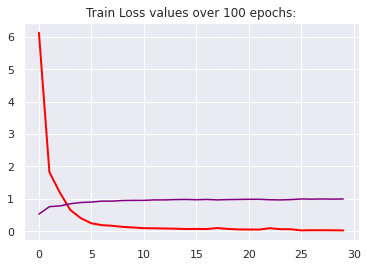

In [ ]:
plt.title('Train Loss values over 100 epochs:')
plt.plot(hist.history['loss'],color='red',linewidth=2)
plt.plot(hist.history['accuracy'],color='purple')

plt.show()

In [ ]:
Y_pred=model.predict(X_test)
Y_pred=(Y_pred>0.5)*1

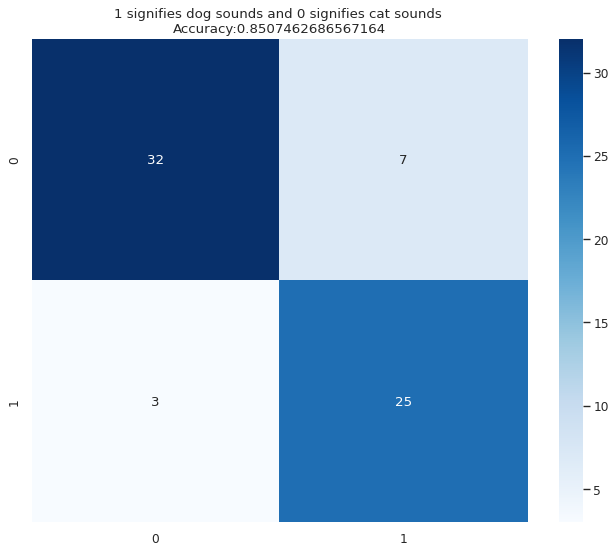

In [ ]:
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cmap='Blues')
plt.title('1 signifies dog sounds and 0 signifies cat sounds \n'+'Accuracy:'+str(accuracy_score(Y_test,Y_pred)))
plt.show()

In [ ]:



print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.91      0.82      0.86        39
           1       0.78      0.89      0.83        28

    accuracy                           0.85        67
   macro avg       0.85      0.86      0.85        67
weighted avg       0.86      0.85      0.85        67

